# Question 1

## Question 1.a

In [5]:
def nor(matrix):
    column_means = matrix.mean(axis=0)
    result_matrix = matrix - column_means
    return result_matrix

In [6]:
import numpy as np
import pandas as pd

def calculate_vector_variance (A):
    U,S,Vt = np.linalg.svd(A ,full_matrices= False)
    eigenvalues = (S ** 2) / (A.shape[0] - 1)
    total_variance = eigenvalues.sum()
    variacne_frac = eigenvalues / total_variance
    #eigenvalues = np.around(eigenvalues,decimals=3)
    #variacne_frac = np.around(variacne_frac,decimals=3)
    return eigenvalues, variacne_frac

In [7]:
import numpy as np
import pandas as pd

# Matrix A
#4: variables
#5: samples
A = np.array([
    [5,5,0,4],
    [1,1,5,0],
    [3,2,0,4],
    [5,3,0,5],
    [0,0,4,0]
])


In [8]:
# samples: 5
# variables: 4
Nor_A = nor(A)

#Nor_A
eigenvalues , variance_farc = calculate_vector_variance(Nor_A)
#Output
#np.set_printoptions(precision=4)
print("Eigenvalues: ")
print(eigenvalues)
print("\nVariance Fractions:")
print(variance_farc)
print(f"\nPercentage of total variance covered by the first eigenvalue: {variance_farc[0] * 100:.5f}%")

Eigenvalues: 
[1.92202892e+01 1.37960341e+00 2.95217138e-01 4.89024219e-03]

Variance Fractions:
[9.19631063e-01 6.60097325e-02 1.41252219e-02 2.33982880e-04]

Percentage of total variance covered by the first eigenvalue: 91.96311%


## Question 1.b

In [9]:
import numpy as np
import pandas as pd

In [10]:
def covariance_matrix(A):
    n_samples = A.shape[0]
    cov = A.T @A / (n_samples - 1 )
    return cov

In [11]:
def eigen_composition(A):
    eigenvalues , eigenvectors = np.linalg.eig(A)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:,sorted_indices]
    return eigenvalues, eigenvectors

In [12]:
def principal_components(A, n_components):
    Nor_A = nor(A)
    cov = covariance_matrix(Nor_A)
    eigenvalues , eigenvectors = eigen_composition(cov)
    principal_components = eigenvectors[:,:n_components]
    PCA_data = np.dot(Nor_A, principal_components)
    return PCA_data, eigenvalues, eigenvectors

In [13]:
bPC1,beigenvalues,beigenvectors = principal_components(A,1)
print("PC1:")
print(bPC1)
print("\n Eigenvalues:")
print(beigenvalues)
print("\n Eigenvectos:")
print(beigenvectors)

PC1:
[[ 3.94645844]
 [-4.53698958]
 [ 1.76612071]
 [ 3.70825924]
 [-4.88384882]]

 Eigenvalues:
[1.92202892e+01 1.37960341e+00 2.95217138e-01 4.89024219e-03]

 Eigenvectos:
[[ 0.50773119  0.32963362  0.56347395 -0.56218131]
 [ 0.38829179  0.73504644 -0.43622104  0.34445236]
 [-0.54916373  0.46697161  0.58788896  0.36707394]
 [ 0.53838436 -0.36467235  0.38287711  0.65617183]]


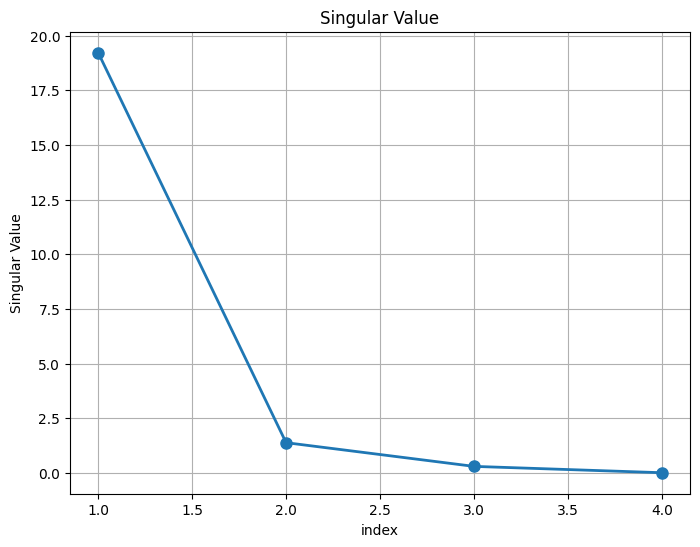

In [14]:

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-', linewidth=2, markersize=8) # from 1 to length +1 we also can use
#plt.plot(range(0, len(eigenvalues) ), eigenvalues, 'o-', linewidth=2, markersize=8)
plt.title('Singular Value')
plt.xlabel('index')
plt.ylabel('Singular Value')
plt.grid(True)
plt.show()

# Question 2

In [52]:
import numpy as np
import pandas as pd
filename = "framingham_heart_disease.csv"
# Load the data
df = pd.read_csv(filename)

variables = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'prevalentHyp']

# Drop NaN value together
X = df[variables].dropna() 
# Split prevalentHyp and rest
y = X['prevalentHyp']
X = X.drop('prevalentHyp', axis=1)

n, m = X.shape

X_c = X - X.mean(axis=0)
U, sigma, VT = np.linalg.svd(X_c)

# eigenvalues
eigen_values = (sigma ** 2)/ (n - 1)

#total variance
trace = np.sum(eigen_values)
fractions = eigen_values / trace
# pca
eigen_vectors = VT.T
X_transformed = X_c @ eigen_vectors
print(X_transformed)
print("\n")
print(eigen_vectors[0])

              0          1          2          3         4          5  \
0    -46.080535  21.732890   1.762059  12.818265 -5.052684   3.450774   
1     11.824267  10.582909  -6.656605  21.372821 -3.604803  -1.512033   
2      7.050118   7.666347  -7.894096  -7.218524  1.149417   0.444137   
3     -8.095616 -21.676905  -6.244180 -23.991452  7.944757  -8.979408   
4     47.195903   9.890647 -17.139161  -2.675119 -1.930331   0.242151   
...         ...        ...        ...        ...       ...        ...   
4233  82.258048 -31.560093  13.162981  -8.762831 -3.134875  14.791458   
4234 -30.966803   4.545851 -17.855679 -29.120497  7.962147  -2.668135   
4235  10.229243   7.593138 -13.256957  -0.508539  6.847180   7.986031   
4236 -27.082290  -0.767565 -12.508999   4.211321 -4.071882  -2.625234   
4237  32.274325   3.262181   4.346460   8.490676  0.214097   0.713275   

             6  
0     3.031173  
1     2.860184  
2     0.211098  
3     1.348978  
4    -2.616733  
...        ...  
4233

In [39]:
for value in eigen_values:
    print(f"{value:.2f}")

2030.38
558.38
156.88
125.88
63.12
38.41
13.84


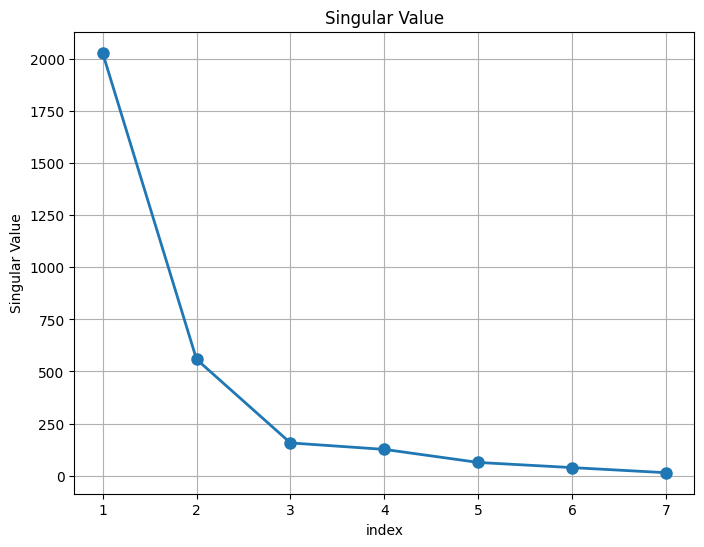

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigen_values) + 1), eigen_values, 'o-', linewidth=2, markersize=8) # from 1 to length +1 we also can use
#plt.plot(range(0, len(eigenvalues) ), eigenvalues, 'o-', linewidth=2, markersize=8)
plt.title('Singular Value')
plt.xlabel('index')
plt.ylabel('Singular Value')
plt.grid(True)
plt.show()

In [45]:
X_percent_variance = fractions * 100
#print(X_percent_variance)
for value in X_percent_variance:
    print(f"{value:.2f}%")

67.98%
18.69%
5.25%
4.21%
2.11%
1.29%
0.46%


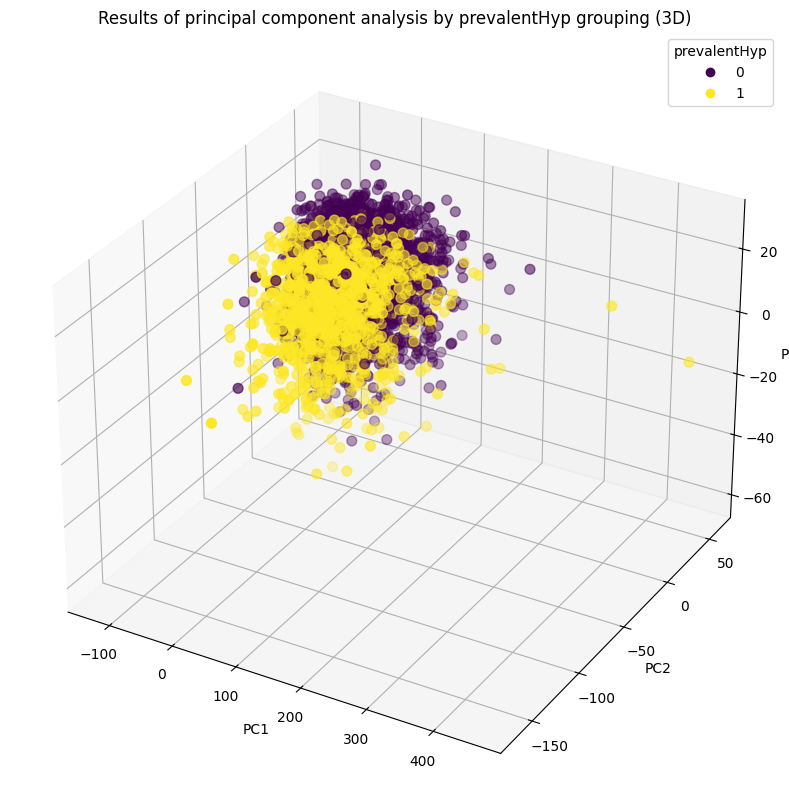

In [49]:
X_PC3 = X_transformed.iloc[:, :3]
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_PC3.iloc[:, 0], X_PC3.iloc[:, 1], X_PC3.iloc[:, 2], c=y, cmap='viridis', s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Results of principal component analysis by prevalentHyp grouping (3D)')
plt.legend(*scatter.legend_elements(), title='prevalentHyp')
plt.show()

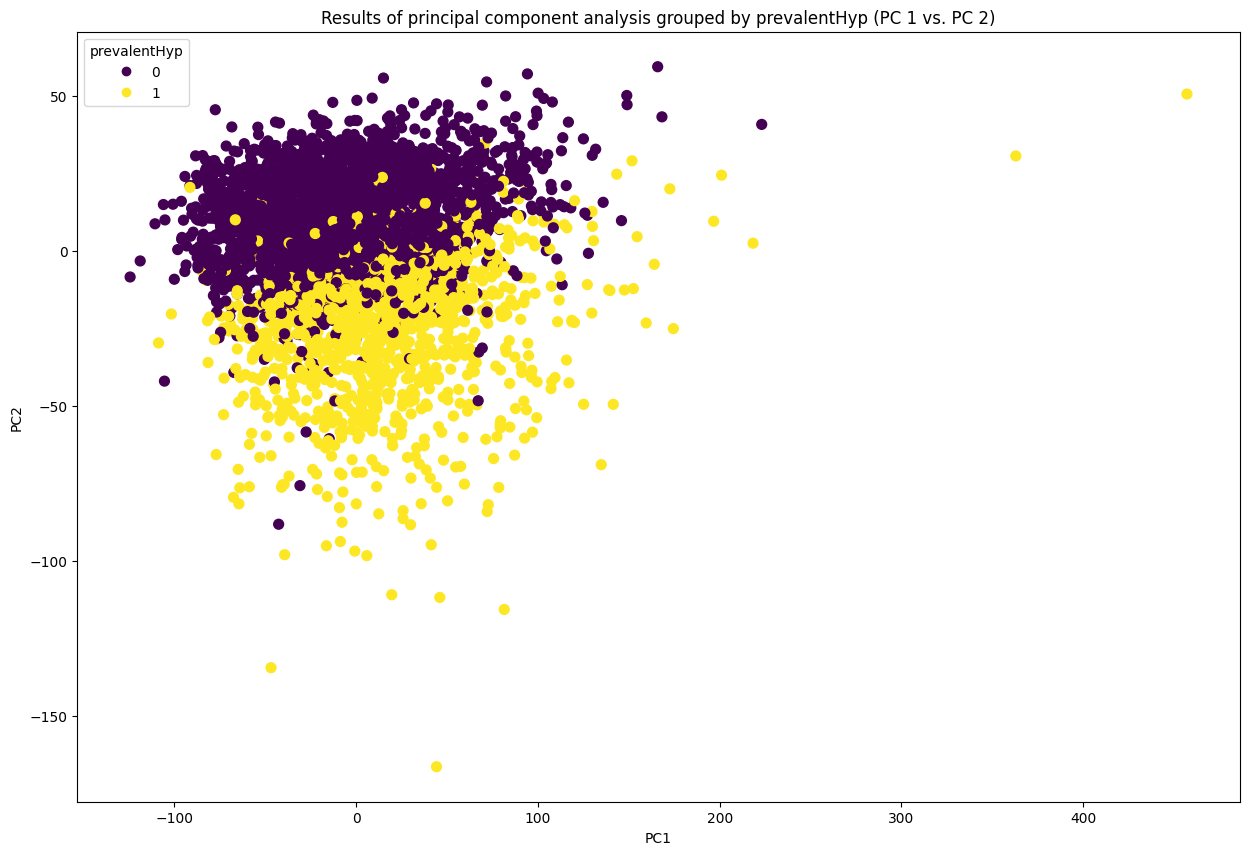

In [51]:
plt.figure(figsize=(15, 10))
plt.scatter(X_PC3.iloc[:, 0], X_PC3.iloc[:, 1], c=y, cmap='viridis', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Results of principal component analysis grouped by prevalentHyp (PC 1 vs. PC 2)')
plt.legend(*scatter.legend_elements(), title='prevalentHyp')
plt.show()

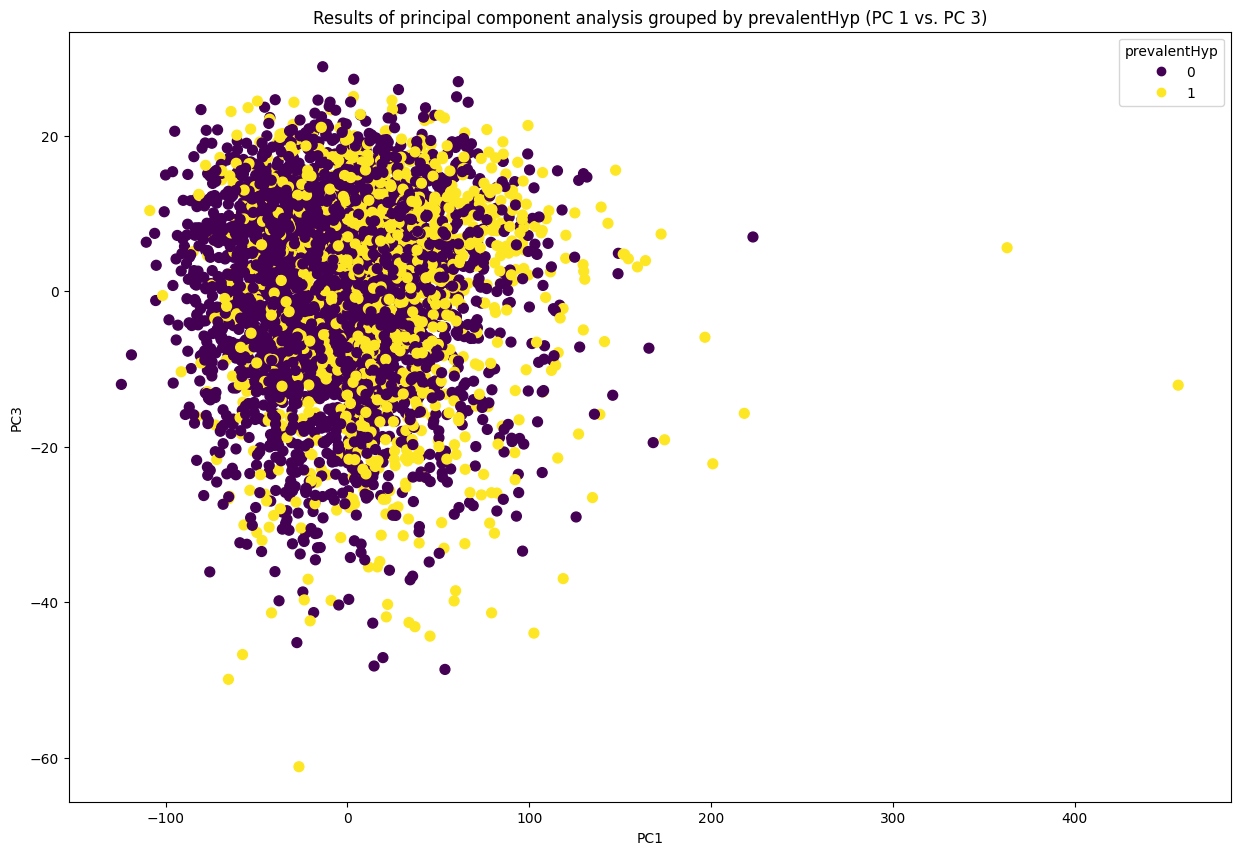

In [50]:
plt.figure(figsize=(15, 10))
plt.scatter(X_PC3.iloc[:, 0], X_PC3.iloc[:, 2], c=y, cmap='viridis', s=50)
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('Results of principal component analysis grouped by prevalentHyp (PC 1 vs. PC 3)')
plt.legend(*scatter.legend_elements(), title='prevalentHyp')
plt.show()